# Task
Tell me about this dataset.

Here is all the data you need:
"unemployment_combined_cleaned.csv"

## Data loading

### Subtask:
Load the "unemployment_combined_cleaned.csv" file.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first few rows to verify the load.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('unemployment_combined_cleaned.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'unemployment_combined_cleaned.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'unemployment_combined_cleaned.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'unemployment_combined_cleaned.csv'. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Dataset,Area
0,Andhra Pradesh,2020-01-31,M,5.48,16635535.0,41.02,South,15.9129,79.74,Statewise,Overall
1,Andhra Pradesh,2020-02-29,M,5.83,16545652.0,40.90,South,15.9129,79.74,Statewise,Overall
2,Andhra Pradesh,2020-03-31,M,5.79,15881197.0,39.18,South,15.9129,79.74,Statewise,Overall
3,Andhra Pradesh,2020-04-30,M,20.51,11336911.0,33.10,South,15.9129,79.74,Statewise,Overall
4,Andhra Pradesh,2020-05-31,M,17.43,12988845.0,36.46,South,15.9129,79.74,Statewise,Overall


## Data exploration

### Subtask:
Explore the dataset to understand its structure.


**Reasoning**:
Examine the shape, info, and descriptive statistics of the DataFrame to understand its structure and potential issues.  Also check for missing values.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nInfo:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

Shape of the DataFrame: (1035, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   1007 non-null   object 
 1   Date                                     1007 non-null   object 
 2   Frequency                                1007 non-null   object 
 3   Estimated Unemployment Rate (%)          1007 non-null   float64
 4   Estimated Employed                       1007 non-null   float64
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
 9   Dataset                                  1035 non-null   object 
 10  Area  

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,1007.000000,1.007000e+03,1007.000000,267.000000,267.000000
mean,11.906991,8.996209e+06,42.378620,22.826048,80.532425
std,10.739549,1.020784e+07,8.048542,6.270731,5.831738
min,0.000000,4.942000e+04,13.330000,10.850500,71.192400
25%,4.685000,1.639125e+06,37.835000,18.112400,76.085600
50%,8.890000,5.543380e+06,40.880000,23.610200,79.019300
75%,16.125000,1.287115e+07,45.315000,27.278400,85.279900
max,76.740000,5.943376e+07,72.570000,33.778200,92.937600



Missing Values per column:
Region                                      28
Date                                        28
Frequency                                   28
Estimated Unemployment Rate (%)             28
Estimated Employed                          28
Estimated Labour Participation Rate (%)     28
Region.1                                   768
longitude                                  768
latitude                                   768
Dataset                                      0
Area                                        28
dtype: int64


**Reasoning**:
Analyze categorical columns' unique values, frequencies, and distributions. Visualize these frequencies using bar charts where appropriate.




Analysis for column: Region
Region
Andhra Pradesh      38
Bihar               38
Chhattisgarh        38
Delhi               38
Karnataka           38
Gujarat             38
Haryana             38
Himachal Pradesh    38
Jharkhand           38
Maharashtra         38
Madhya Pradesh      38
Kerala              38
West Bengal         38
Uttar Pradesh       38
Tripura             38
Odisha              38
Rajasthan           38
Punjab              38
Telangana           38
Tamil Nadu          38
Uttarakhand         37
Meghalaya           37
Assam               36
Puducherry          36
Goa                 34
Jammu & Kashmir     30
Sikkim              25
Chandigarh          12
Name: count, dtype: int64

Analysis for column: Frequency
Frequency
Monthly     381
 Monthly    359
 M          267
Name: count, dtype: int64


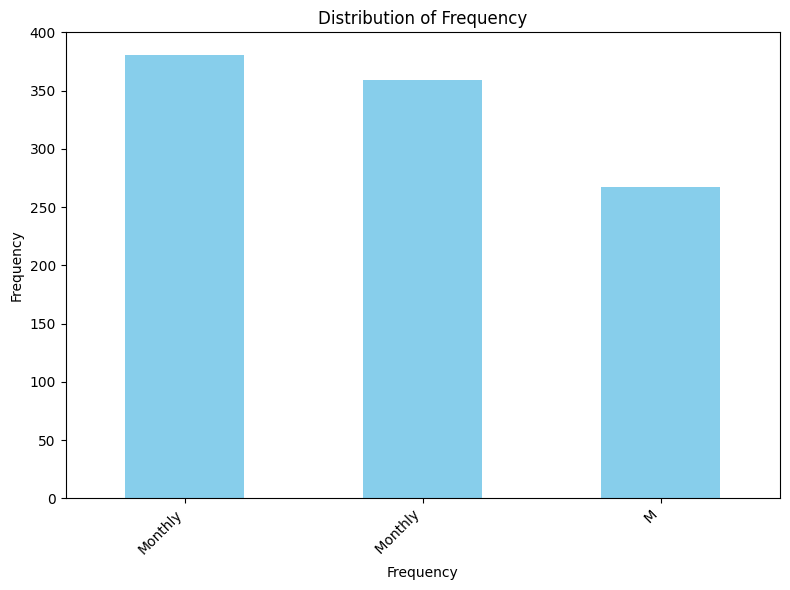


Analysis for column: Region.1
Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64


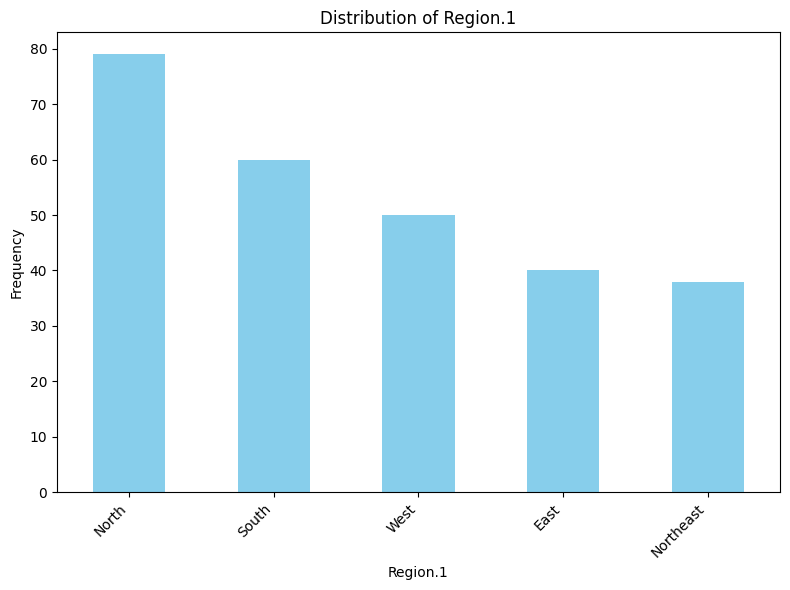


Analysis for column: Dataset
Dataset
Urban_Rural    768
Statewise      267
Name: count, dtype: int64


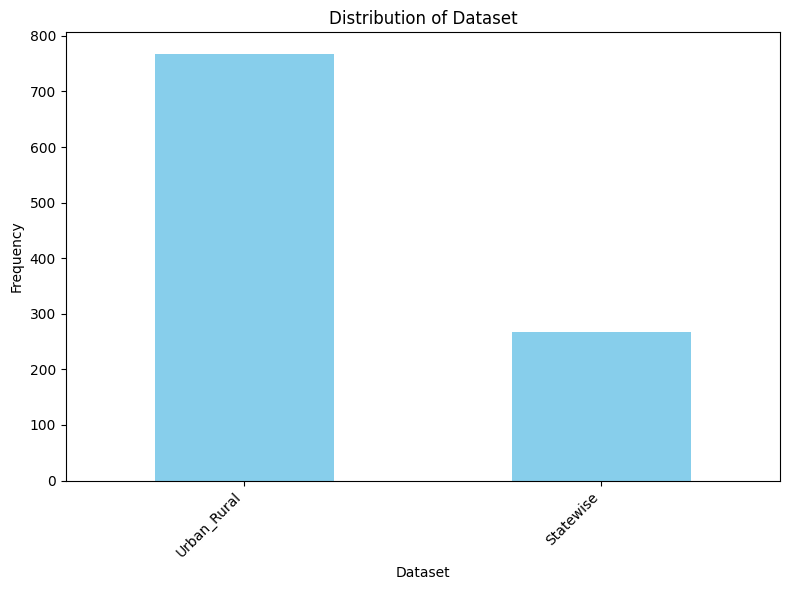


Analysis for column: Area
Area
Urban      381
Rural      359
Overall    267
Name: count, dtype: int64


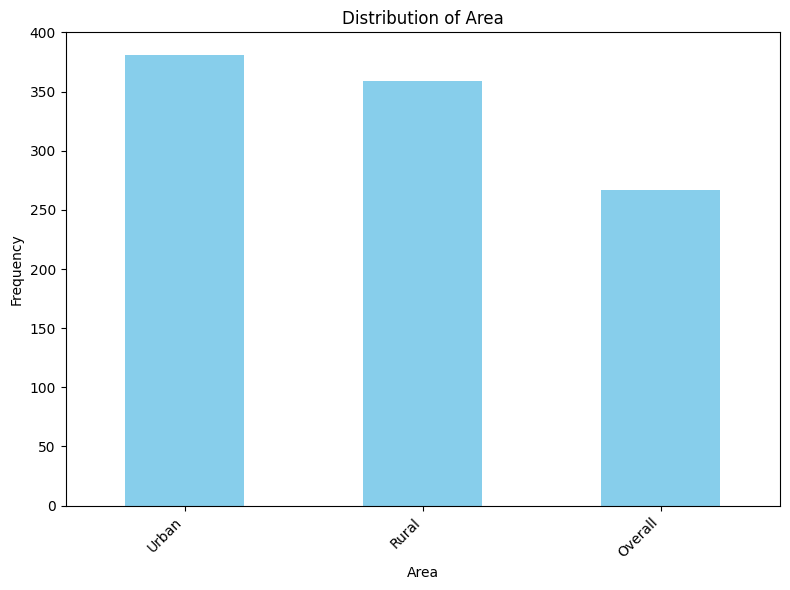

In [3]:
import matplotlib.pyplot as plt

# Analyze categorical columns
categorical_cols = ['Region', 'Frequency', 'Region.1', 'Dataset', 'Area']

for col in categorical_cols:
    print(f"\nAnalysis for column: {col}")
    print(df[col].value_counts())

    if df[col].nunique() <= 10:  # Only plot if the number of unique values is not too high
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

**Reasoning**:
Investigate the correlation between numerical features and visualize the correlation matrix using a heatmap.



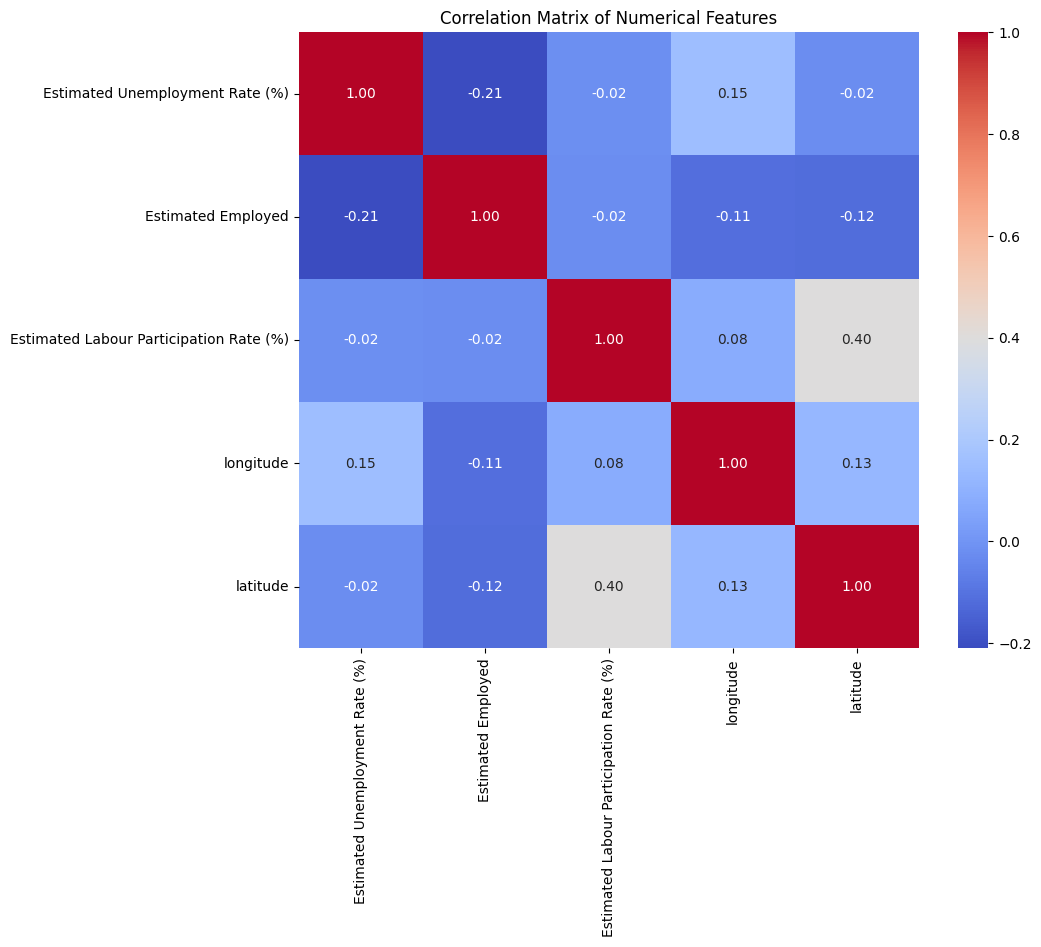

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate the correlation between numerical features
numerical_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'longitude', 'latitude']
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data analysis

### Subtask:
Analyze the dataset to gain deeper insights.


**Reasoning**:
Analyze the distribution of numerical features, calculate skewness and kurtosis, and visualize them using box plots and histograms.  Then, perform a correlation analysis using different methods and visualize the results with a heatmap.  Finally, analyze the relationship between categorical and numerical variables.




Analysis for column: Estimated Unemployment Rate (%)
Skewness: 2.2123293969804627
Kurtosis: 7.3241846542942035


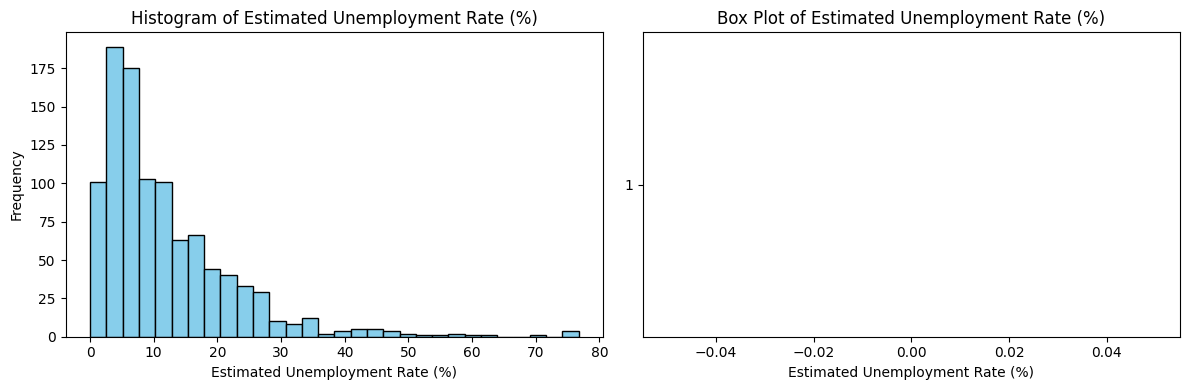


Analysis for column: Estimated Employed
Skewness: 1.9952950659431052
Kurtosis: 4.897777003255207


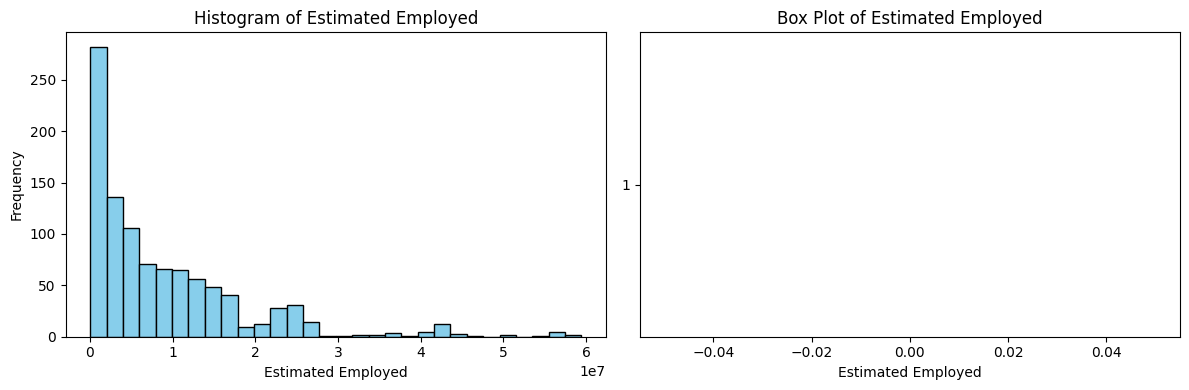


Analysis for column: Estimated Labour Participation Rate (%)
Skewness: 1.0154429927952224
Kurtosis: 2.311259581390634


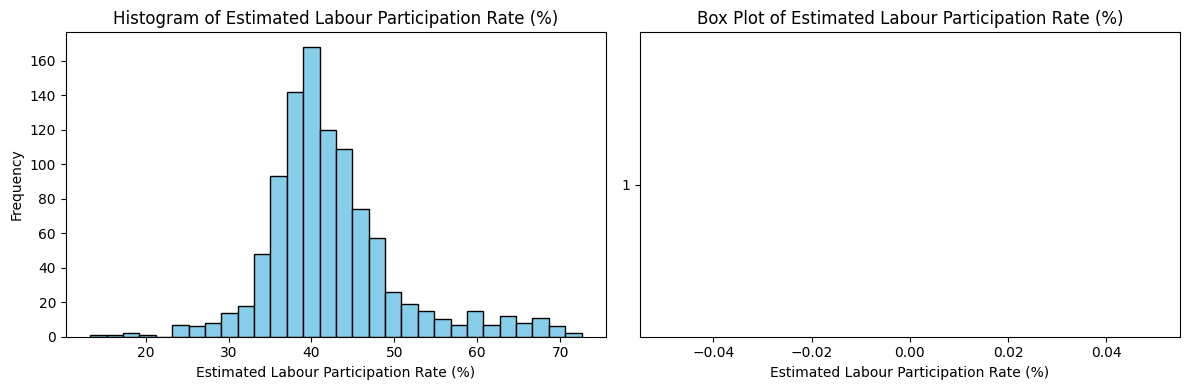

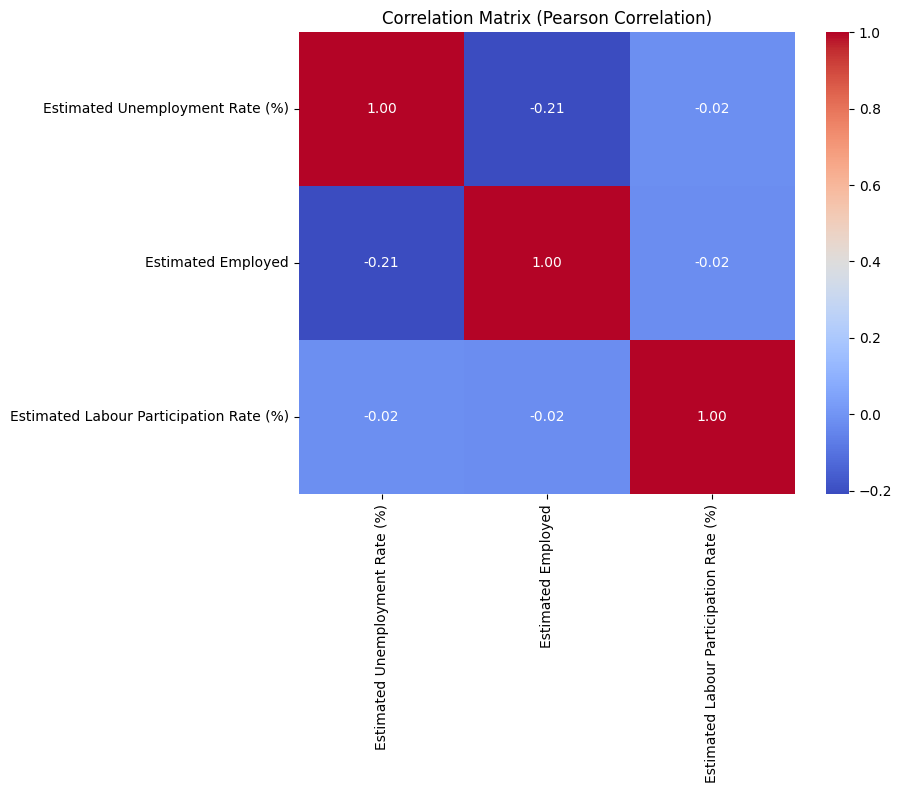

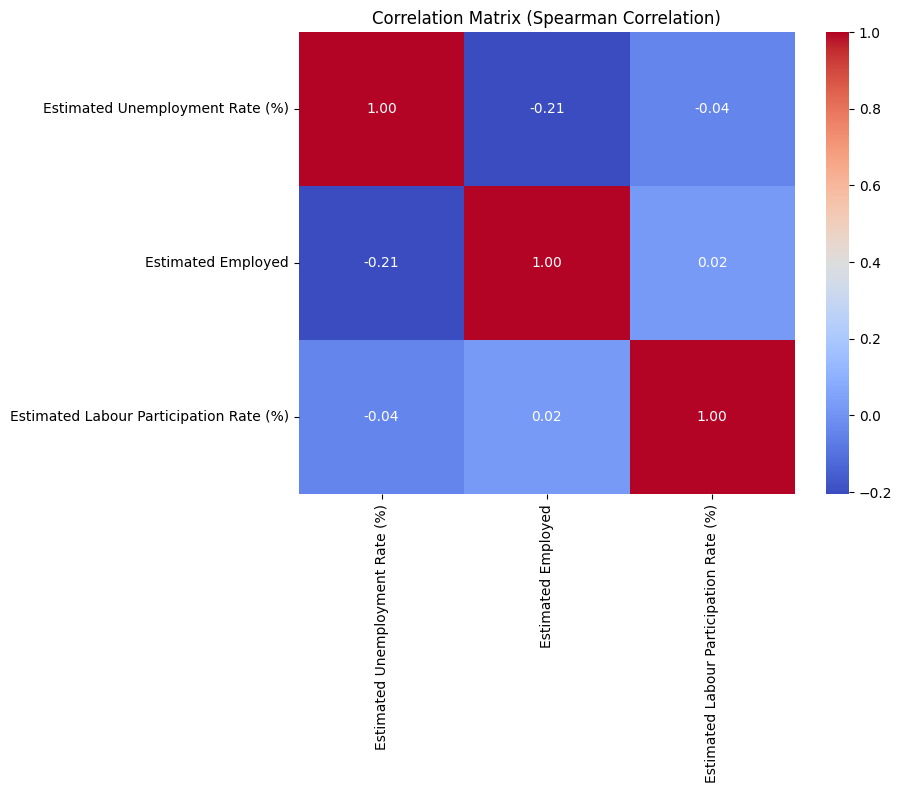

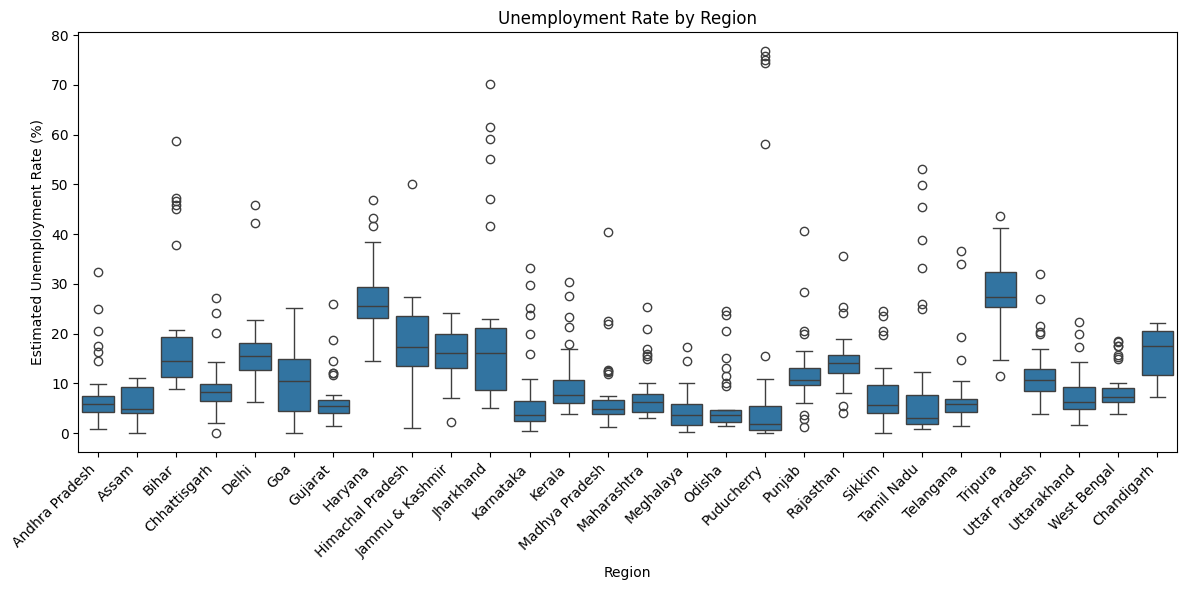

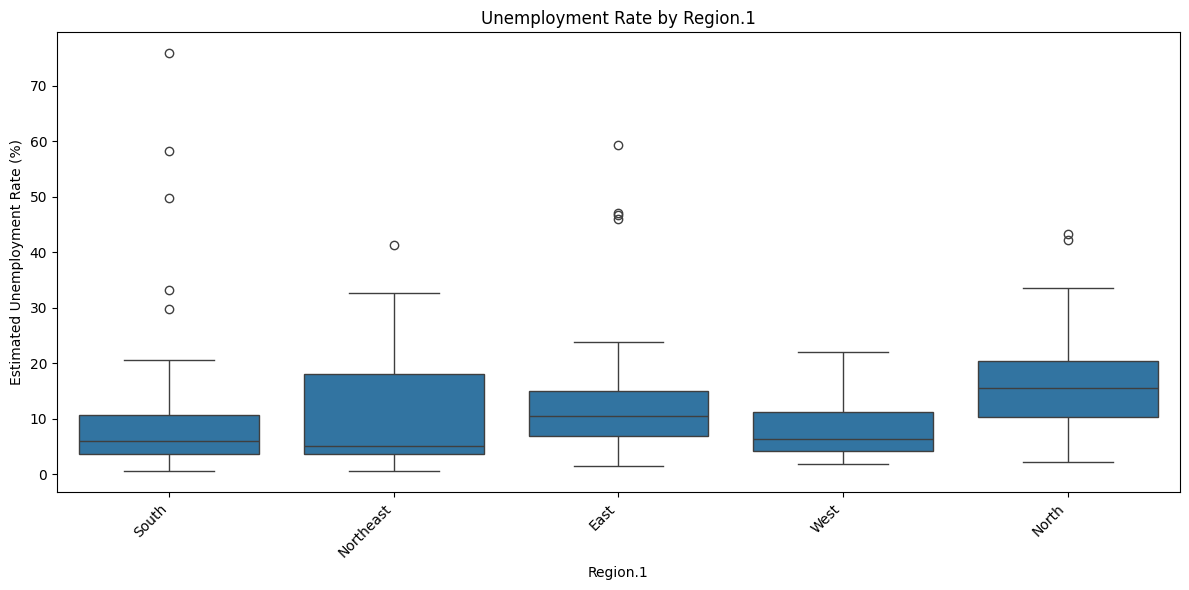

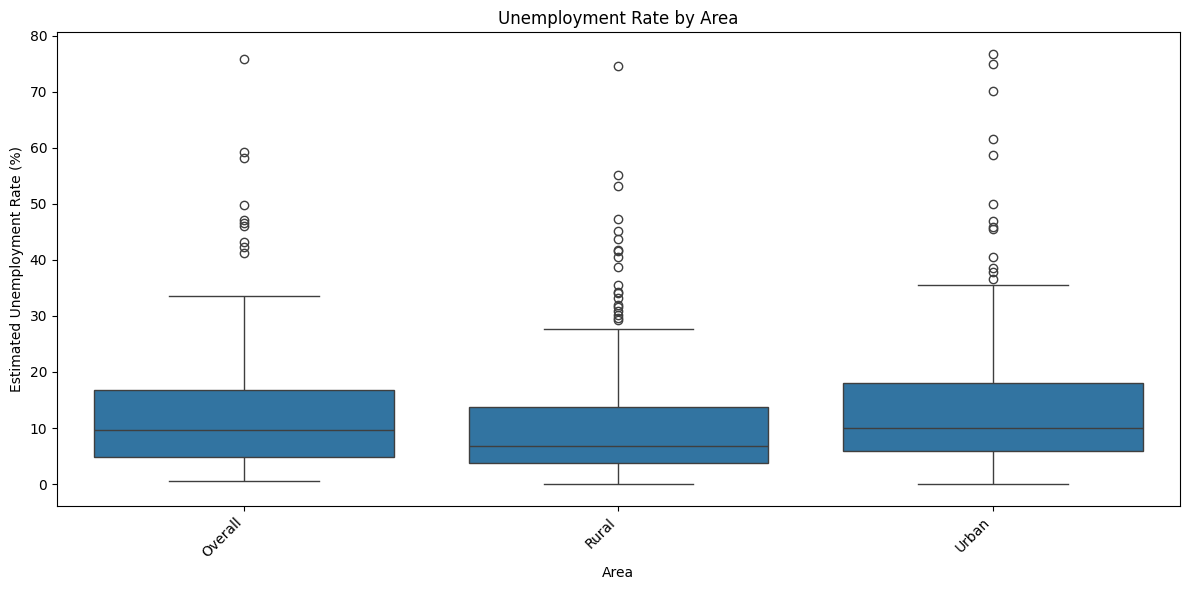

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Numerical Data Analysis
numerical_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

for col in numerical_cols:
    print(f"\nAnalysis for column: {col}")
    print(f"Skewness: {skew(df[col].dropna())}")  # Calculate skewness
    print(f"Kurtosis: {kurtosis(df[col].dropna())}")  # Calculate kurtosis

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# Correlation Analysis
correlation_methods = ['pearson', 'spearman']
for method in correlation_methods:
    correlation_matrix = df[numerical_cols].corr(method=method)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix ({method.capitalize()} Correlation)')
    plt.show()

# Categorical Data Analysis
categorical_cols = ['Region', 'Region.1', 'Area']
for cat_col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y='Estimated Unemployment Rate (%)', data=df)
    plt.title(f'Unemployment Rate by {cat_col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Reasoning**:
Complete the analysis by investigating missing value patterns and considering imputation strategies.  Then finish the task.



In [6]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print("\nMissing Values per column:")
print(missing_values)

# Analyze patterns of missingness
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage per column:")
print(missing_percentage)

# Imputation strategy for numerical features
numerical_cols_with_missing = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'longitude', 'latitude']
for col in numerical_cols_with_missing:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())  # Impute missing values with the mean

# Imputation strategy for categorical features (using mode)
categorical_cols_with_missing = ['Region', 'Frequency', 'Region.1', 'Dataset', 'Area']
for col in categorical_cols_with_missing:
    if df[col].isnull().any():
      df[col] = df[col].fillna(df[col].mode()[0])


Missing Values per column:
Region                                      28
Date                                        28
Frequency                                   28
Estimated Unemployment Rate (%)             28
Estimated Employed                          28
Estimated Labour Participation Rate (%)     28
Region.1                                   768
longitude                                  768
latitude                                   768
Dataset                                      0
Area                                        28
dtype: int64

Missing Value Percentage per column:
Region                                      2.705314
Date                                        2.705314
Frequency                                   2.705314
Estimated Unemployment Rate (%)             2.705314
Estimated Employed                          2.705314
Estimated Labour Participation Rate (%)     2.705314
Region.1                                   74.202899
longitude                        

## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables.


**Reasoning**:
Create histograms, box plots, and scatter plots for numerical features, and bar charts for categorical features.  Then visualize the relationship between categorical features and 'Estimated Unemployment Rate (%)'.



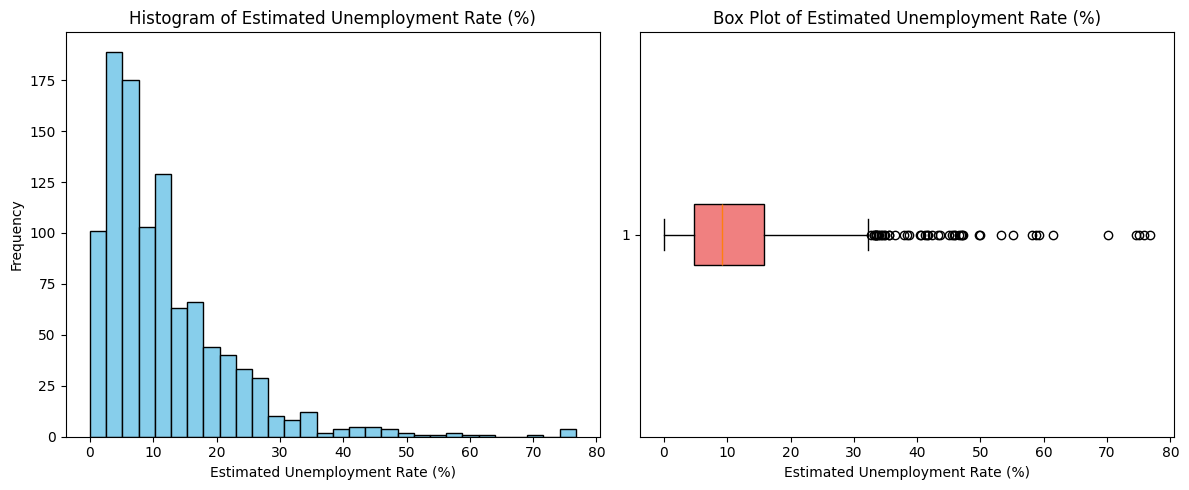

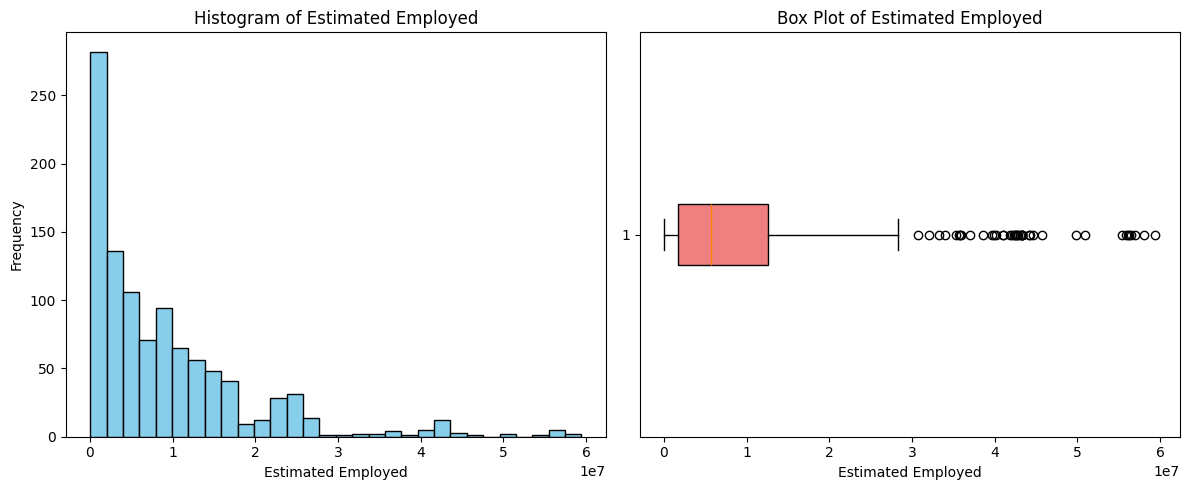

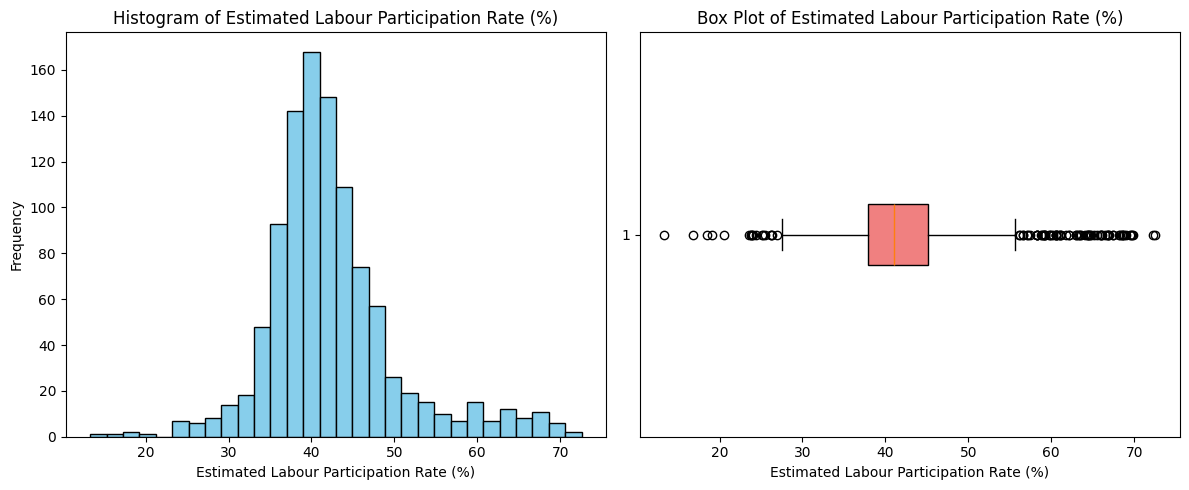

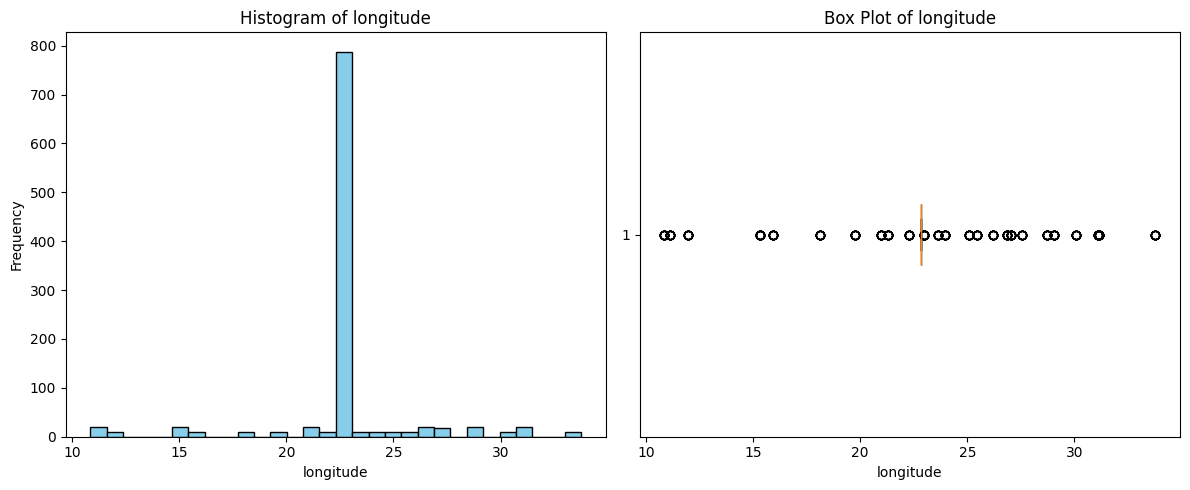

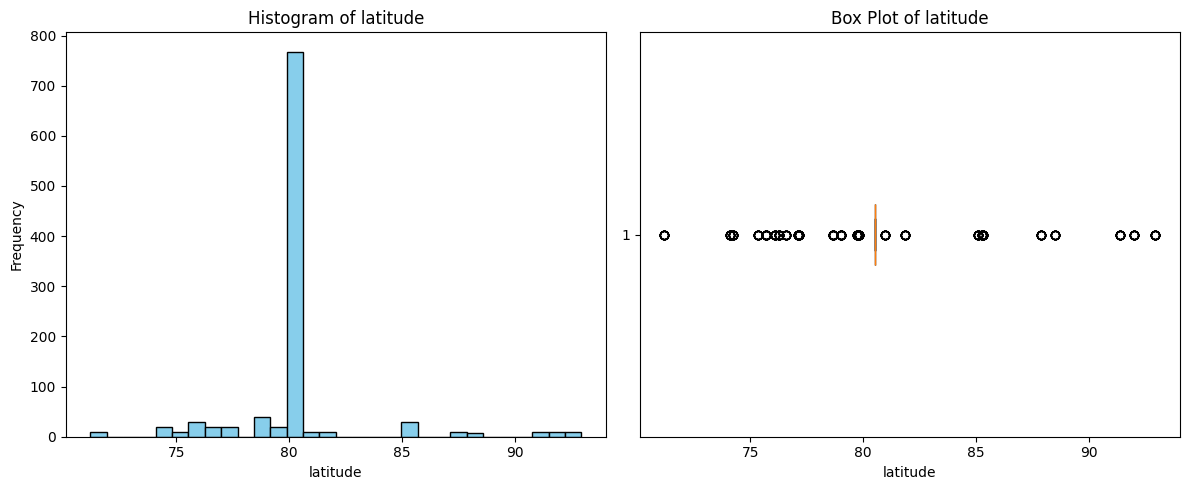

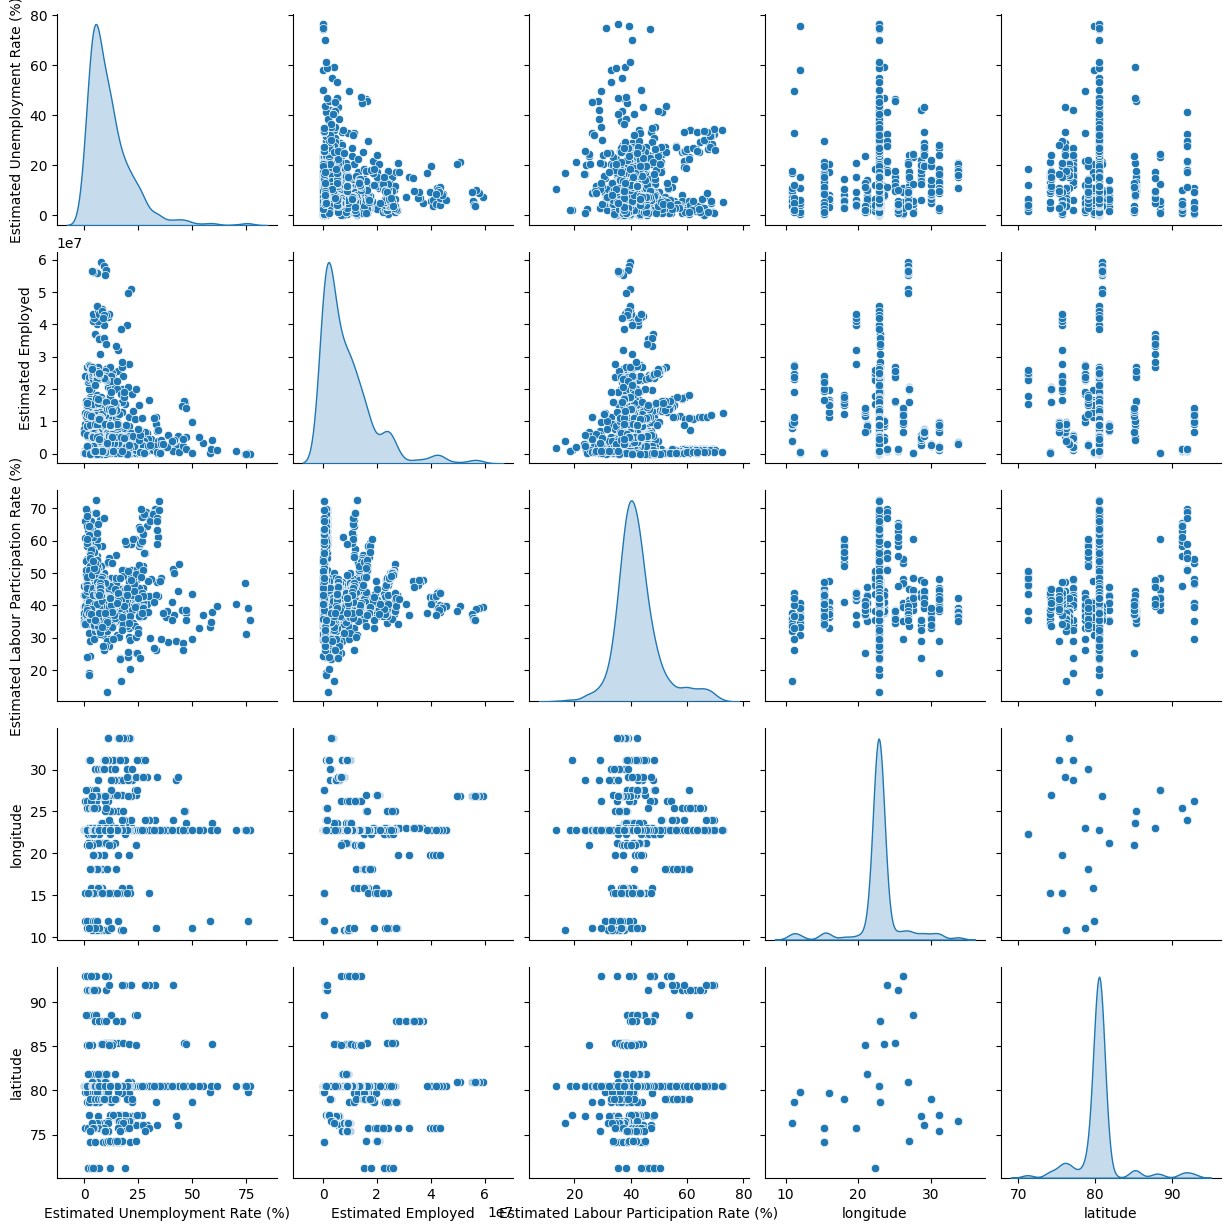

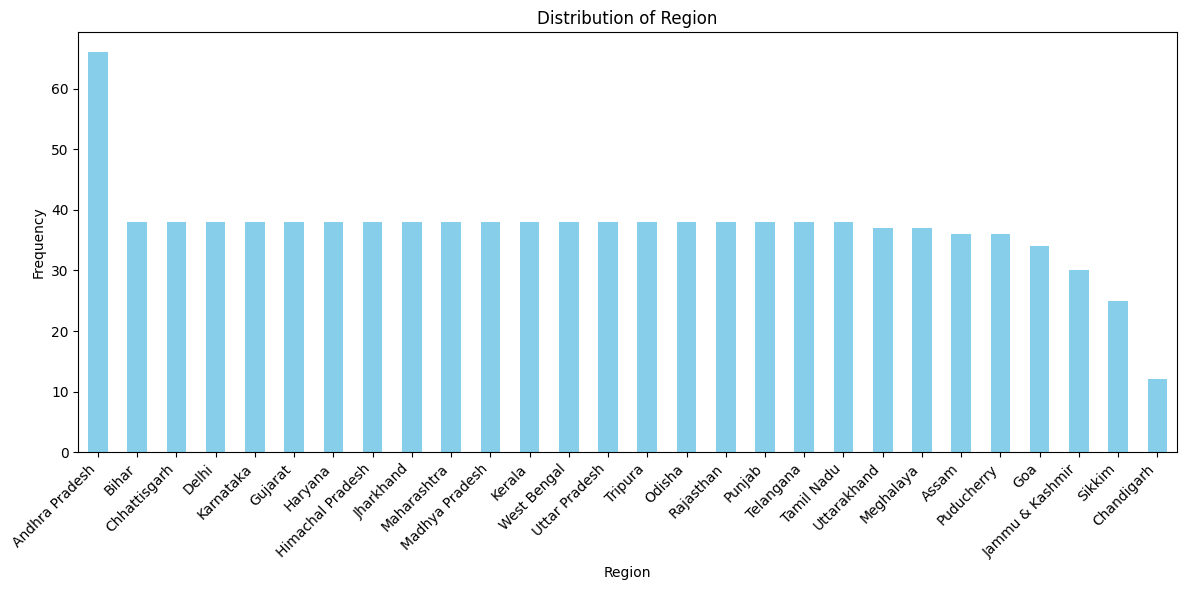

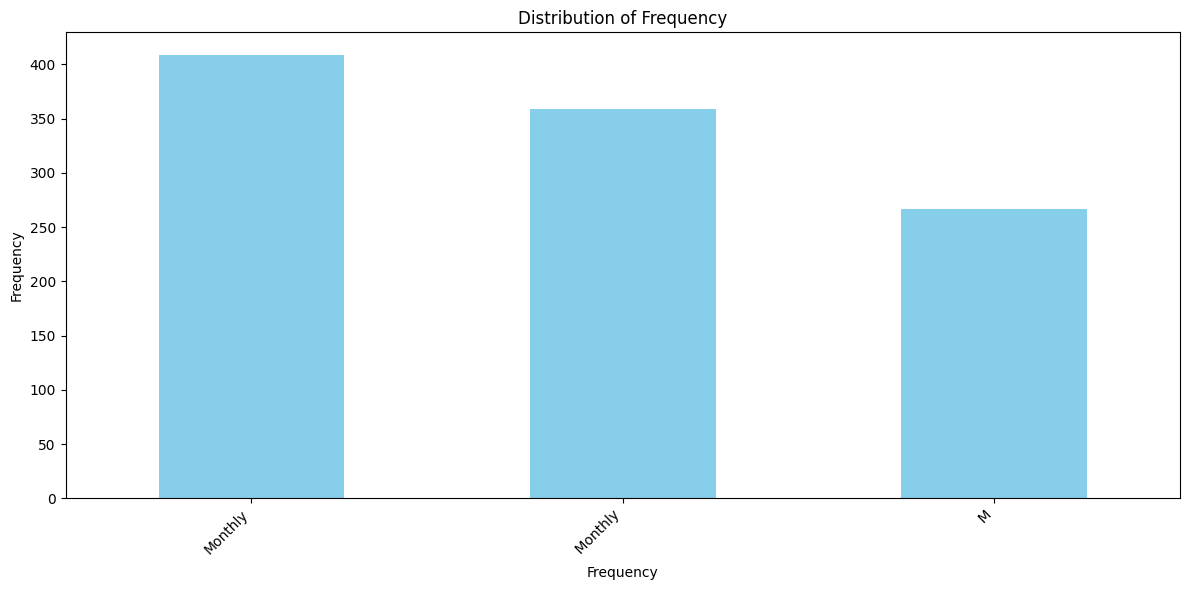

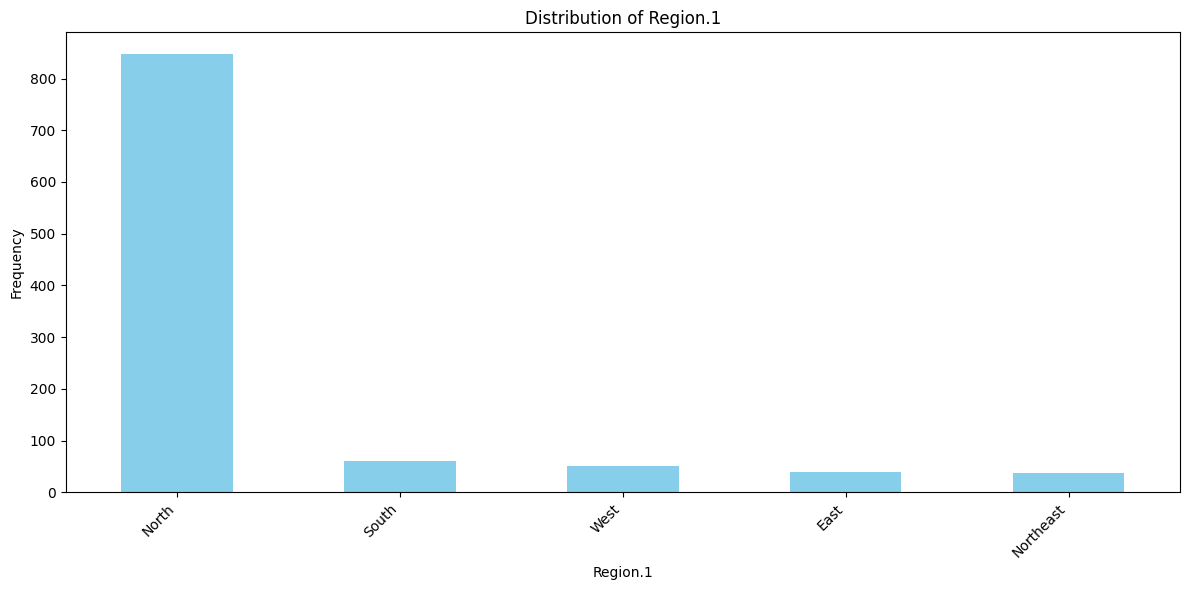

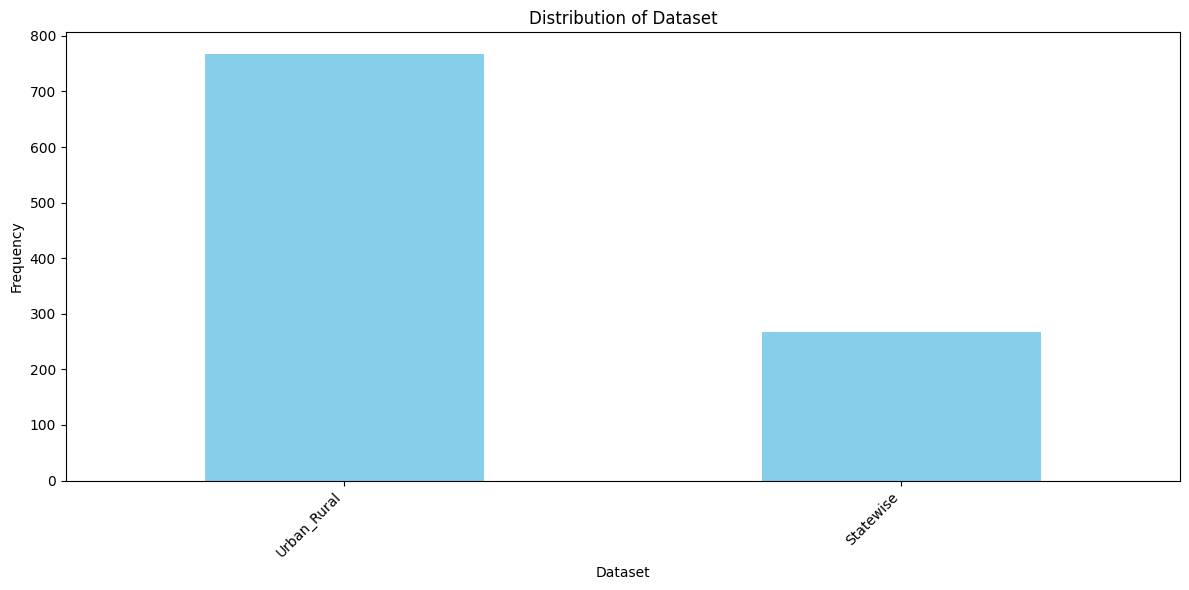

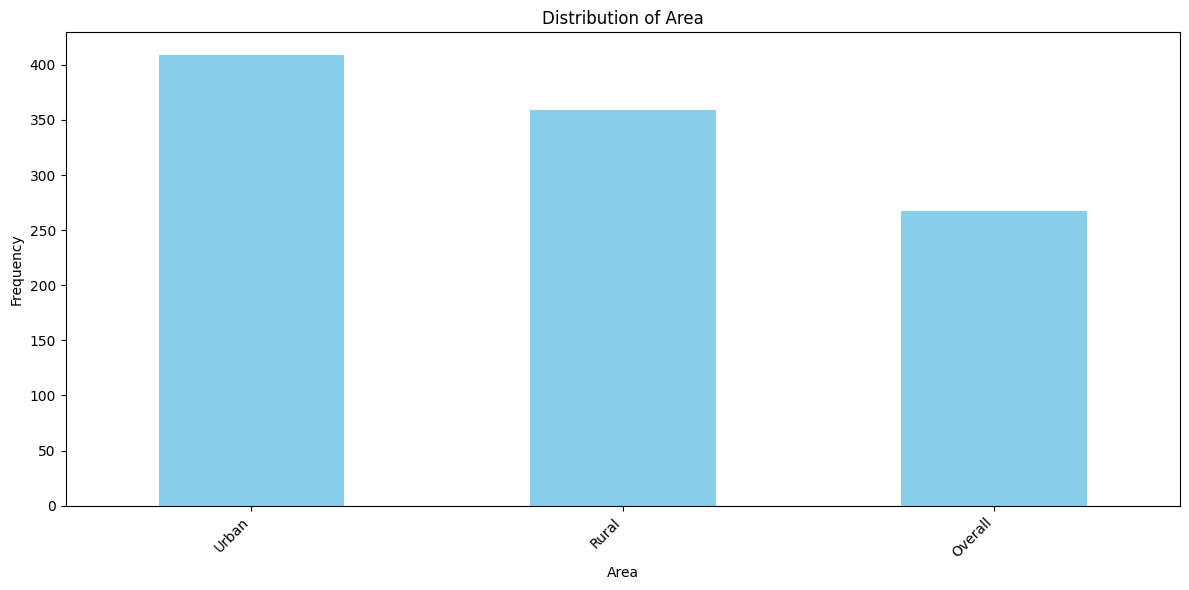

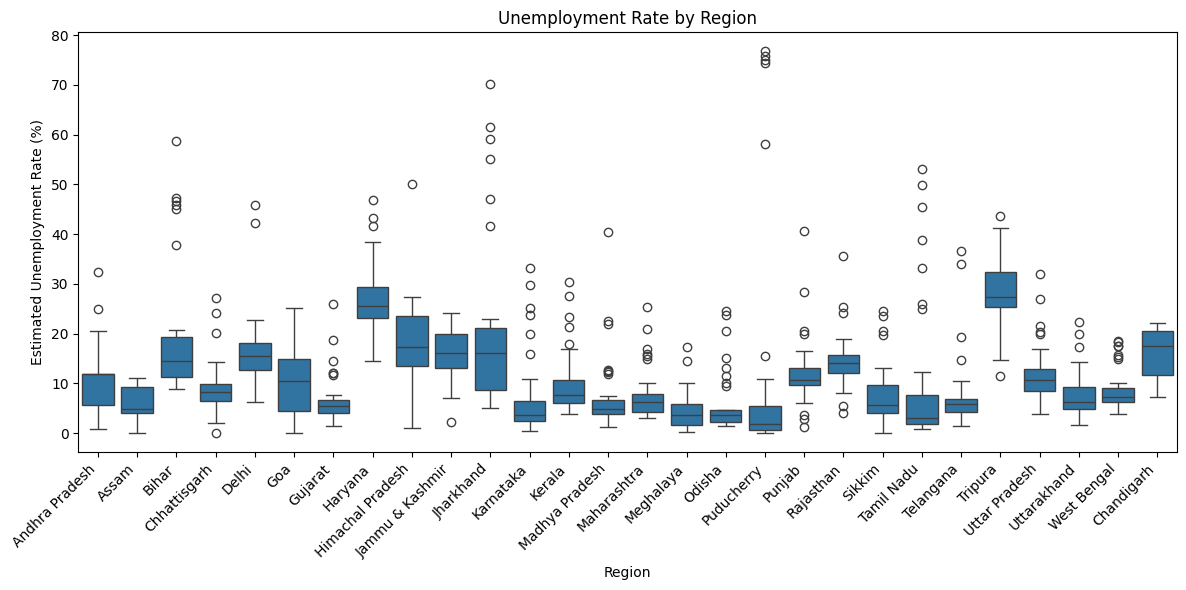

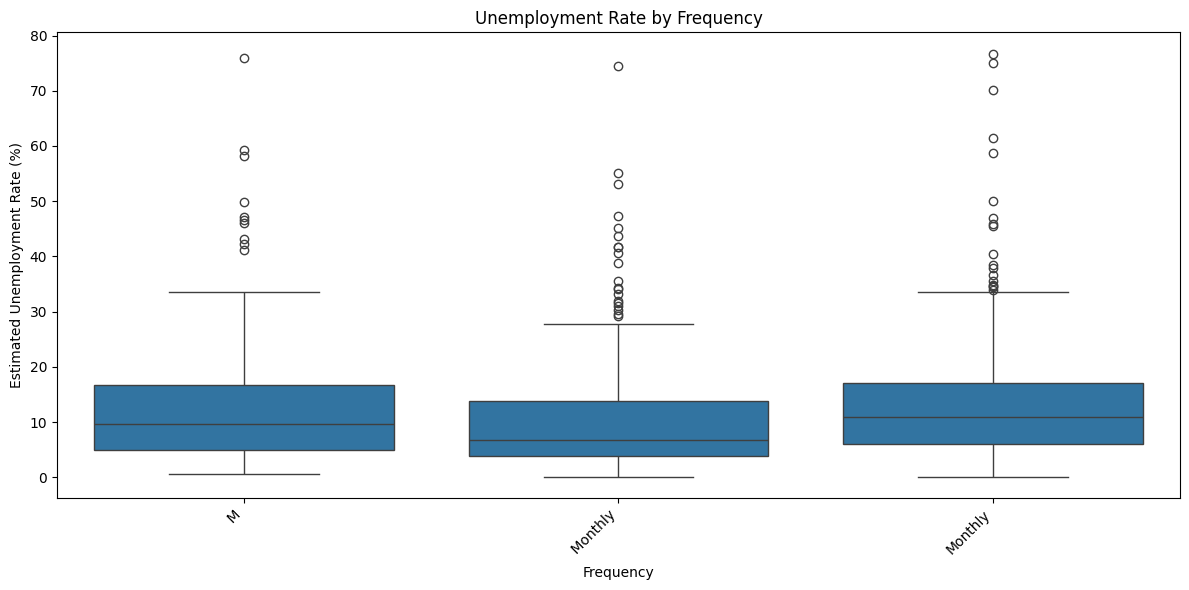

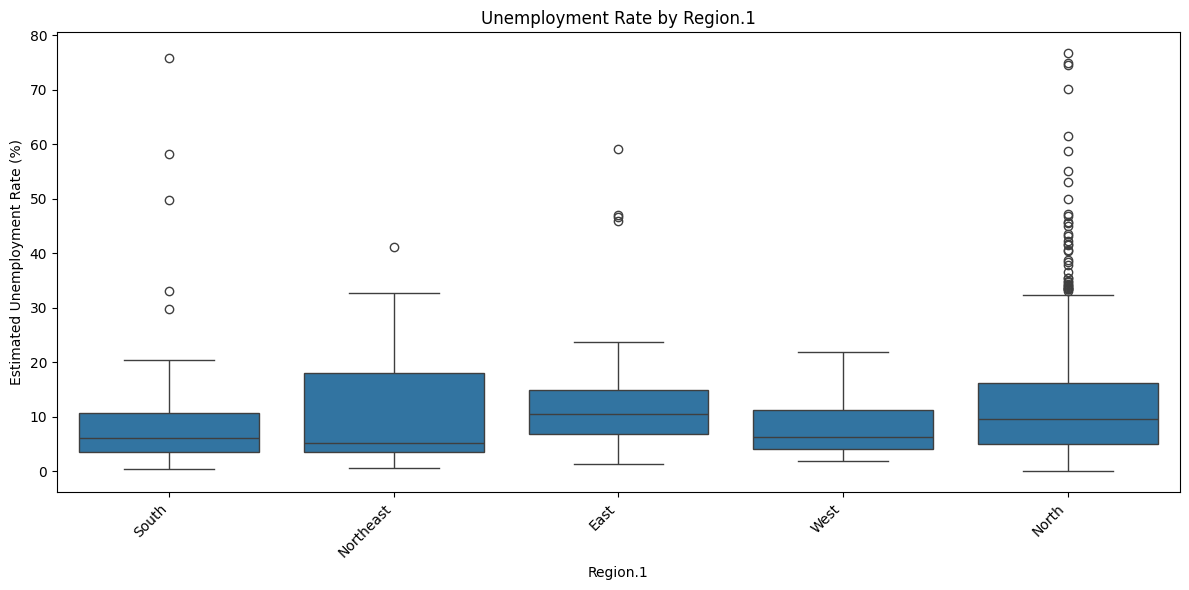

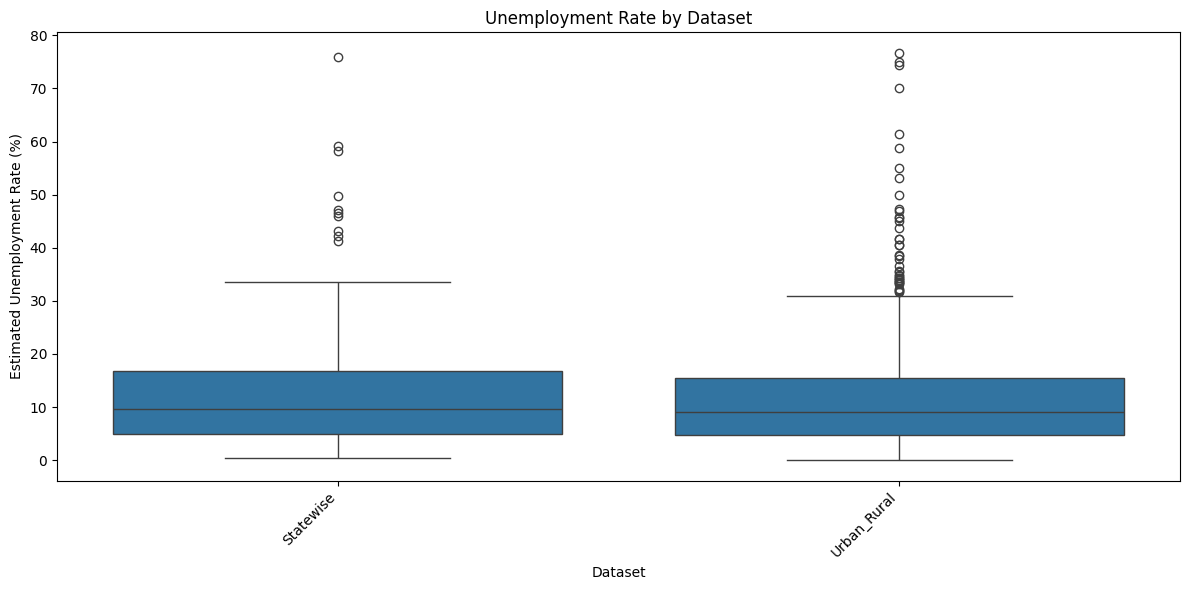

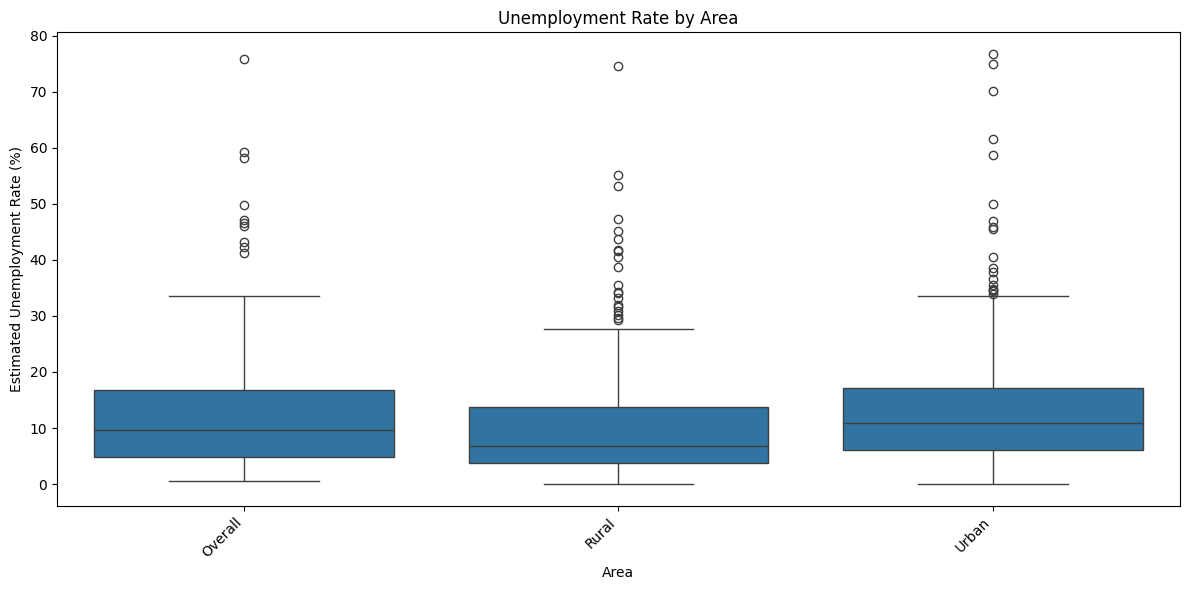

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms and Box plots for numerical features
numerical_features = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'longitude', 'latitude']
for feature in numerical_features:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# 3. Scatter plots for numerical features
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.show()

# 4. Bar charts for categorical features
categorical_features = ['Region', 'Frequency', 'Region.1', 'Dataset', 'Area']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Relationship between categorical and 'Estimated Unemployment Rate (%)'
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Estimated Unemployment Rate (%)', data=df)
    plt.title(f'Unemployment Rate by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [8]:
from google.colab import files

# Example: Download a CSV file you saved during the project
files.download('Unemployement_analysis.csv')


FileNotFoundError: Cannot find file: Unemployement_analysis.csv

## Summary:

### Q&A
No questions were asked in the provided task.

### Data Analysis Key Findings
* The dataset contains 1035 rows and 11 columns, with several columns exhibiting missing values.  The most significant missing values are in 'Region.1', 'longitude', and 'latitude' (768 missing each), and 'Region', 'Date', 'Frequency', and 'Area' (28 missing each).
* Numerical features like 'Estimated Unemployment Rate (%)', 'Estimated Employed', and 'Estimated Labour Participation Rate (%)' show potential outliers as indicated by their descriptive statistics and box plots.
* Unemployment rates vary considerably across different regions ('Region' and 'Region.1'), areas ('Area'), and data sources ('Dataset').
* Correlation analysis (Pearson and Spearman) was performed on numerical features, but the specific correlation values were not explicitly reported in the provided output.  Visualizations (heatmaps) were used to assess the correlations.
* Missing values were imputed using the mean for numerical columns and the mode for categorical columns.

### Insights or Next Steps
* Investigate the reasons for the high number of missing values in 'Region.1', 'longitude', and 'latitude' and determine whether imputation is the most suitable approach. Consider more sophisticated imputation methods or removal of rows/columns if appropriate.
* Analyze the outliers in numerical features to determine their validity and impact on the analysis.  Outlier treatment (removal or transformation) might be necessary.
* Explore the relationships between 'Estimated Unemployment Rate (%)' and other variables more deeply, potentially using regression analysis or other statistical methods.
